## Predicting Wine Quality

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import RANSACRegressor

In [2]:
Wine_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv',sep=';')

In [3]:
Wine_data1 = Wine_data.copy()

In [4]:
Wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
Wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [6]:
Wine_data.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [7]:
Wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* The dataset has 12 numerical columns and zero categotical columns
* the dataset has no missing values

In [8]:
Wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Visualizing quality of the wine

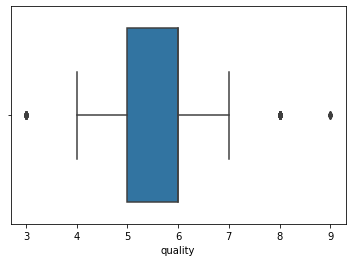

In [9]:
sns.boxplot(Wine_data.quality)
plt.show()

### there are some outliers in the data set which have to removed

In [10]:
### using IQR to remove th outliers
Q1 = Wine_data.quantile(0.25)
Q3 = Wine_data.quantile(0.75)
IQR = Q3 - Q1
IQR

fixed acidity            1.000000
volatile acidity         0.110000
citric acid              0.120000
residual sugar           8.200000
chlorides                0.014000
free sulfur dioxide     23.000000
total sulfur dioxide    59.000000
density                  0.004377
pH                       0.190000
sulphates                0.140000
alcohol                  1.900000
quality                  1.000000
dtype: float64

In [11]:
Wine_data_out = Wine_data[~( (Wine_data < (Q1 - 1.5*IQR))|(Wine_data > (Q3 + 1.5*IQR)) ).any(axis=1)]

In [12]:
Wine_data_out.shape

(3854, 12)

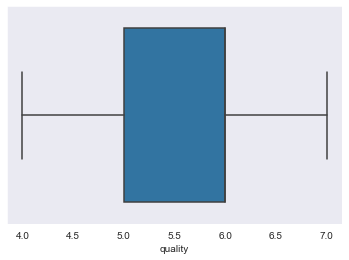

In [13]:
### rechecking if the outliers are removed
sns.set_style('dark')
sns.boxplot(Wine_data_out.quality)
plt.show()

### Dividing the data set into Train and Target 

In [14]:
target = Wine_data_out.quality

In [15]:
Wine_data_out = Wine_data_out.drop(columns = 'quality')

In [16]:
# performing scaling on the training dataet
minmax = MinMaxScaler()

In [17]:
Wine_data_tf = minmax.fit_transform(Wine_data_out)

In [18]:
Wine_data_tf

array([[0.55      , 0.4691358 , 0.55319149, ..., 0.23287671, 0.42592593,
        0.06896552],
       [0.375     , 0.54320988, 0.5106383 , ..., 0.64383562, 0.5       ,
        0.18965517],
       [0.825     , 0.49382716, 0.63829787, ..., 0.5890411 , 0.40740741,
        0.29310345],
       ...,
       [0.425     , 0.39506173, 0.19148936, ..., 0.21917808, 0.44444444,
        0.17241379],
       [0.175     , 0.51851852, 0.42553191, ..., 0.69863014, 0.2962963 ,
        0.75862069],
       [0.3       , 0.32098765, 0.59574468, ..., 0.5890411 , 0.18518519,
        0.5862069 ]])

In [19]:
trainX, testX, trainY, testY = train_test_split(Wine_data_tf,target)

In [20]:
lr = LogisticRegression()

In [21]:
lr.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
lr.coef_.shape

(4, 11)

In [23]:
lr.coef_

array([[ 0.47056859,  1.05975357, -0.14849414, -1.27302141,  0.86973691,
        -3.17736393, -1.14913368,  0.58948011, -0.53732694, -0.80288001,
        -1.95488431],
       [-0.02613175,  2.12497802, -0.21496961, -1.61099718,  0.49006844,
        -0.54739321,  0.5081585 ,  1.39914034, -0.66966805, -0.56053957,
        -4.37894981],
       [-0.23940569, -1.44537611, -0.08966692,  0.15922443, -0.08938083,
         0.36223579, -0.08295138,  0.24906323, -0.19429447, -0.06244096,
         1.01359063],
       [ 0.68488719, -1.05100433,  0.28352134,  2.01111527, -0.99065828,
         0.65216851, -0.42125771, -2.52179099,  1.48293541,  0.88135672,
         3.17370508]])

In [24]:
Wine_data_out.shape

(3854, 11)

In [25]:
target.shape

(3854,)

In [26]:
lr.score(testX,testY)

0.5311203319502075

In [27]:
lr.score(trainX,trainY)

0.5567474048442906

In [28]:
### identifying the best degree of the features that is in correlation with the target

for deg in range(1,7):
    pol = PolynomialFeatures(degree = deg)
    feature_data_n = pol.fit_transform(Wine_data_tf)
    trainX, testX, trainY, testY = train_test_split(feature_data_n,target)
    lr = LogisticRegression()
    lr.fit(trainX,trainY)
    print('Degree',deg, 'Train Acc',np.round(lr.score(trainX,trainY),2))
    print('Degree',deg, 'Test Acc',np.round(lr.score(testX,testY),2))
    print('----------------------------------')

Degree 1 Train Acc 0.55
Degree 1 Test Acc 0.55
----------------------------------
Degree 2 Train Acc 0.6
Degree 2 Test Acc 0.55
----------------------------------
Degree 3 Train Acc 0.59
Degree 3 Test Acc 0.6
----------------------------------
Degree 4 Train Acc 0.61
Degree 4 Test Acc 0.59
----------------------------------
Degree 5 Train Acc 0.63
Degree 5 Test Acc 0.6
----------------------------------
Degree 6 Train Acc 0.63
Degree 6 Test Acc 0.59
----------------------------------


**Features of degree 3 have low variance and low bias compared to other degress hence best suited for prediction**